# 분석의 목적(문제 정의) : 데이터를 탐색하여 다음 분기에 어떤 게임을 설계해야 좋을지 인사이트 뽑기

## 데이터 탐색

In [33]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [34]:
# 나눔바른고딕체 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [35]:
# 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 






dataset = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
dataset= dataset.drop('Unnamed: 0', axis = 1)
dataset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [37]:
dataset.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [38]:
dataset.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


년도에 한자리 혹은 두자리가 있는것이 확인됨.

찾아본 결과 앞의 두 자리 누락

## 데이터 클리닝

### 결측값 처리

Year 전처리

In [39]:
# 년도 자릿수 누락 데이터 전처리

Year =[]
for i in dataset['Year']:
  if i <= 20:
    Year.append(2000 + i)
  elif i <= 99:
    Year.append(1900 + i)
  else:
    Year.append(i)

Year

[2008.0,
 2009.0,
 2010.0,
 2010.0,
 2010.0,
 2005.0,
 2011.0,
 2005.0,
 2007.0,
 2011.0,
 2001.0,
 2003.0,
 2008.0,
 2005.0,
 2006.0,
 2009.0,
 2003.0,
 2014.0,
 2015.0,
 2009.0,
 2002.0,
 1997.0,
 2005.0,
 2014.0,
 2013.0,
 2002.0,
 1996.0,
 2011.0,
 2004.0,
 2000.0,
 2011.0,
 nan,
 2006.0,
 2015.0,
 2004.0,
 2009.0,
 2005.0,
 1984.0,
 2008.0,
 2006.0,
 2000.0,
 2004.0,
 2007.0,
 2008.0,
 2013.0,
 2015.0,
 1998.0,
 2002.0,
 2008.0,
 2009.0,
 2005.0,
 2009.0,
 2001.0,
 2009.0,
 2009.0,
 2010.0,
 2016.0,
 2010.0,
 2010.0,
 1985.0,
 2006.0,
 2008.0,
 2010.0,
 2011.0,
 2004.0,
 1998.0,
 2011.0,
 2004.0,
 2014.0,
 2010.0,
 1999.0,
 2007.0,
 2015.0,
 2003.0,
 2009.0,
 2010.0,
 1985.0,
 2000.0,
 2007.0,
 2008.0,
 2005.0,
 1997.0,
 1997.0,
 2003.0,
 2000.0,
 2003.0,
 1995.0,
 2005.0,
 2010.0,
 1999.0,
 2010.0,
 2005.0,
 2011.0,
 2014.0,
 2003.0,
 1998.0,
 2011.0,
 2001.0,
 2010.0,
 1993.0,
 2014.0,
 2009.0,
 2002.0,
 2004.0,
 2005.0,
 2007.0,
 2005.0,
 2000.0,
 2016.0,
 nan,
 2012.0,
 2007.0

In [40]:
dataset['Year'] = pd.Series(Year)
dataset['Year']

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16598, dtype: float64

In [41]:
# 변경전 Year의 통계수치와 차이를 확인해 볼 수 있다.
dataset.describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [42]:
# Year를 Genre와 Publisher의 조합으로 추론하기
# 회사마다 주 활동시기 및 장르의 선택에 따른 시기가 다르므로 장르와 회사와의
# 관계를 통해 Year를 추론하고자 한다.
Year_calculate = dataset[['Year','Genre','Publisher']].groupby(['Genre','Publisher']).mean()
Year_calculate

Year
Genre    Publisher                                          
Action   20th Century Fox Video Games            1981.500000
         3DO                                     1999.823529
         505 Games                               2009.952381
         5pb                                     2013.800000
         989 Studios                             1998.500000
...                                                      ...
Strategy Vivendi Games                           2002.916667
         Warner Bros. Interactive Entertainment  2010.000000
         Westwood Studios                        1999.000000
         Zoo Digital Publishing                  2008.000000
         Zushi Games                             2008.000000

[1822 rows x 1 columns]

Year의 결측값을 해결하기위해 쓰는 두개의 컬럼(Genre와 Publisher)을 먼저 전처리해주어야 한다.

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [44]:
dataset.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

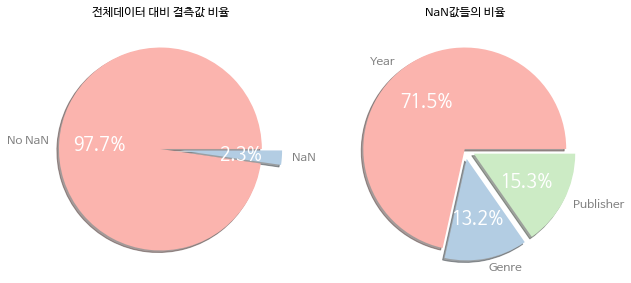

In [45]:
sns.set_context('notebook')
sns.set_palette('Pastel1')

fig, ax = plt.subplots(1,2,figsize =(10,5))


sizes1 = [16219/16598, 379/16598]
labels1 = ['No NaN','NaN']


pathes, texts, autotexts = ax[0].pie(sizes1,
                                   labels = labels1,
                                   autopct ='%1.1f%%',
                                   shadow = True,
                                   explode = (0, 0.2))

for t in texts:
  t.set_fontsize(12)
  t.set_color('gray')

for t in autotexts:
  t.set_color('white')
  t.set_fontsize(18)

ax[0].set_title('전체데이터 대비 결측값 비율')




sizes2 = [271/379, 50/379, 58/379]
labels2 = ['Year','Genre', 'Publisher']

pathes, texts, autotexts = ax[1].pie(sizes2,
                                   labels = labels2,
                                   autopct ='%1.1f%%',
                                   shadow = True,
                                   explode = (0, 0.1,0.1))

for t in texts:
  t.set_fontsize(12)
  t.set_color('gray')

for t in autotexts:
  t.set_color('white')
  t.set_fontsize(18)

ax[1].set_title('NaN값들의 비율')

plt.show()

NaN값을 비교해 봤더니 전체데이터 대비 NaN값이 2.3% 밖에 되지 않고, 극소수의 NaN값들 안에서도 "Genre"와 "Publisher"는  극히 일부이므로 NaN값을 처리하는데 있어서 drop을 해주는것이 좋다고 판단했다. 극히 일부의 NaN값을 위해 결측값처리의 방법론을 활용하여 넣어준다해도 오차가 생기는데 이러한 데이터 결측처리를 위해서 오차를 허용하면서 할 필요성을 느끼지 못하여 과감하게 drop해준다.

반면 Year역시 전체데이터와 비교했을때 극히 일부의 데이터에 불과하지만 "Genre"와 "Publisher" 를 같이 비교했을땐 비중이 높다 하지만 앞에서 이 둘을 drop처리했기때문에 같이 drop처리를 해준다.

(아주 작은데이터 라도 무시할 수 없지만 극히 일부의 데이터를 위해 필요이상의 시간을 낭비하는것 또한 비효율이라고 생각했다.)

Year, Genre, Publisher 전처리

In [46]:
# Year, Genre, Publisher 세개의 feature에 빈값이 있는 행 제거
dataset = dataset.dropna(subset = ['Genre'], axis = 0, how = 'any')
dataset = dataset.dropna(subset = ['Publisher'], axis = 0, how = 'any')
dataset = dataset.dropna(subset = ['Year'], axis = 0, how = 'any')

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [48]:
# Year데이터 int형 변환
dataset['Year'] =dataset['Year'].astype(int)
dataset['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16241, dtype: int64

In [49]:
dataset.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

대륙별 출고량 전처리

In [50]:
# 대륙별 출고량 데이터 확인하기
dataset.iloc[:,5:].head(50)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
5,0,0,0.14,0
6,0.02,0.01,0,0
7,0.07,0,0.11,0.01
8,0,0,0.04,0
9,0.04,0.03,0,0.01


In [51]:
# 파일의 index 문제로  "Keyerror" 해결을 위한 index 재설정
dataset = dataset.reset_index()
dataset = dataset.drop('index',axis = 1)
dataset.iloc[:,5:].head(50)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
5,0,0,0.14,0
6,0.02,0.01,0,0
7,0.07,0,0.11,0.01
8,0,0,0.04,0
9,0.04,0.03,0,0.01


In [52]:
# 전체데이터 단위 통일


pd.options.mode.chained_assignment = None

# 단위 변환 함수(XK ->0.001X/ M -> 1)
def convert(column):
  for i in range(len(column)):
    if (str(type(column[i]))=="<class 'str'>"):
      if (column[i].find('K') != -1):
        column[i] = re.sub('K','',column[i])
        column[i] = float(column[i])
        column[i] *= 0.001
      elif (column[i].find('M') != -1):
        column[i] = re.sub('M','',column[i])
        column[i] = float(column[i])
  return column



In [53]:
# 데이터 타입 변환(object -> float)
dataset['NA_Sales'] = pd.to_numeric(convert(dataset['NA_Sales']))
dataset['EU_Sales'] = pd.to_numeric(convert(dataset['EU_Sales']))
dataset['JP_Sales'] = pd.to_numeric(convert(dataset['JP_Sales']))
dataset['Other_Sales'] = pd.to_numeric(convert(dataset['Other_Sales']))

In [54]:
# 형변환 확인
dataset.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### 이상치 확인 및 처리


In [56]:
# 이상치 확인 함수
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  mask = np.where((data > upper_bound) | (data < lower_bound))

  return mask

find_outlier_by_Tukey(dataset['NA_Sales'])

(array([   90,   105,   119, ..., 16217, 16227, 16234]),)

In [57]:
dataset['NA_Sales'][find_outlier_by_Tukey(dataset['NA_Sales'])[0]].index

Int64Index([   90,   105,   119,   123,   146,   152,   162,   179,   189,
              220,
            ...
            16160, 16176, 16183, 16189, 16190, 16191, 16197, 16217, 16227,
            16234],
           dtype='int64', length=1650)

출고량 데이터의 이상치의 발생요인을 세가지로 정리 해 보았다.

1. 독보적인 인기로 인한 이상치
2. 단위 오류로 인한 이상치 발생(Ex)'K'의 누락)
3. 데이터 수집 과정에서의 문제

In [58]:
dataset.sort_values('NA_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
10280,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
1187,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
...,...,...,...,...,...,...,...,...,...
8432,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016,Misc,FuRyu,0.00,0.00,0.04,0.00
8431,Minna no Conveni,DS,2010,Simulation,Taito,0.00,0.00,0.01,0.00
8430,MotoGP 15,X360,2015,Racing,Milestone S.r.l.,0.00,0.01,0.00,0.00
8429,Apassionata: Die Galanacht der Pferde,DS,2009,Simulation,RTL,0.00,0.04,0.00,0.01


메가히트작을 아웃라이어로 제거 하는 것 보다 따로 데이터를 나누어 메가히트작의 특징을 분석해 보고 일반 작품의 특성과 비교를 해봄으로서 새로운 인사이트를 도출 해 보자

In [59]:
Megahit_NA = dataset['NA_Sales'][find_outlier_by_Tukey(dataset['NA_Sales'])[0]].index
Megahit_NA

Int64Index([   90,   105,   119,   123,   146,   152,   162,   179,   189,
              220,
            ...
            16160, 16176, 16183, 16189, 16190, 16191, 16197, 16217, 16227,
            16234],
           dtype='int64', length=1650)

In [60]:
Megahit = []

for i in Megahit_NA:
  Megahit.append(i)

Megahit 

[90,
 105,
 119,
 123,
 146,
 152,
 162,
 179,
 189,
 220,
 253,
 256,
 257,
 270,
 280,
 287,
 319,
 333,
 338,
 359,
 361,
 367,
 372,
 378,
 387,
 419,
 437,
 438,
 442,
 452,
 458,
 466,
 478,
 494,
 502,
 503,
 511,
 529,
 545,
 553,
 560,
 561,
 568,
 570,
 586,
 593,
 595,
 607,
 608,
 611,
 612,
 613,
 623,
 628,
 633,
 634,
 645,
 646,
 653,
 661,
 663,
 670,
 672,
 673,
 735,
 745,
 751,
 768,
 787,
 791,
 811,
 815,
 835,
 841,
 858,
 923,
 937,
 939,
 951,
 956,
 992,
 1017,
 1021,
 1030,
 1031,
 1045,
 1079,
 1082,
 1091,
 1092,
 1095,
 1106,
 1124,
 1128,
 1131,
 1139,
 1151,
 1154,
 1164,
 1187,
 1204,
 1222,
 1223,
 1242,
 1244,
 1256,
 1263,
 1292,
 1294,
 1298,
 1299,
 1300,
 1304,
 1326,
 1343,
 1352,
 1361,
 1364,
 1365,
 1372,
 1378,
 1401,
 1405,
 1406,
 1411,
 1460,
 1476,
 1485,
 1489,
 1522,
 1525,
 1537,
 1539,
 1544,
 1549,
 1575,
 1582,
 1601,
 1606,
 1610,
 1624,
 1625,
 1636,
 1647,
 1678,
 1734,
 1745,
 1766,
 1780,
 1797,
 1822,
 1835,
 1838,
 1842,
 184

In [61]:
Megadata = []
for i in Megahit:
  Megadata.append(dataset.iloc[i,:])


In [62]:
Megadata = pd.DataFrame(Megadata)
Megadata = Megadata.reset_index()
Megadata = Megadata.drop('index', axis =1)
Megadata

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Disney Universe,Wii,2011,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10
1,Madden NFL 2001,PS2,2000,Sports,Electronic Arts,1.19,0.07,0.05,0.20
2,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90
3,Mortal Kombat,PS3,2011,Fighting,Warner Bros. Interactive Entertainment,1.98,0.55,0.00,0.32
4,Yu-Gi-Oh! The Sacred Cards,GBA,2002,Role-Playing,Konami Digital Entertainment,0.94,0.35,0.00,0.02
...,...,...,...,...,...,...,...,...,...
1645,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",PS2,2007,Action,Activision,0.63,0.37,0.00,0.11
1646,Left 4 Dead,X360,2008,Shooter,Electronic Arts,2.66,0.50,0.05,0.30
1647,Finding Nemo,PS2,2003,Action,THQ,1.26,0.60,0.05,0.18
1648,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13


In [65]:
Megadata.sort_values('NA_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
257,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
385,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
1037,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
99,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
1259,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
...,...,...,...,...,...,...,...,...,...
1034,FIFA 14,PS4,2013,Sports,Electronic Arts,0.61,1.85,0.11,0.33
782,Golden Sun: The Lost Age,GBA,2002,Role-Playing,Nintendo,0.61,0.27,0.27,0.07
1035,The Sims 3,Wii,2010,Simulation,Electronic Arts,0.61,0.73,0.00,0.15
780,Baldur's Gate: Dark Alliance,PS2,2001,Role-Playing,Virgin Interactive,0.61,0.48,0.00,0.16


## 정규성 검정

## EDA

### EDA계획 
1. 지역별 출고량의 상관관계 파악하기
2. 지역에 따라 선호하는 게임의 장르가 다른지 파악하기
3. 연도별 게임의 트렌드가 있는지 파악하기
4. 게임의 트렌드가 있다면 트렌드에 대한 지역별 반응 파악하기
5. 출고량이 높은 게임에 대한 분석 및 시각화를 통한 파악하기
6. 연도별 플랫폼 변화 파악하기
7. 플랫폼 별 지역의 출고량 차이 파악하기

### 1. 지역별 출고량의 상관관계 파악하기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


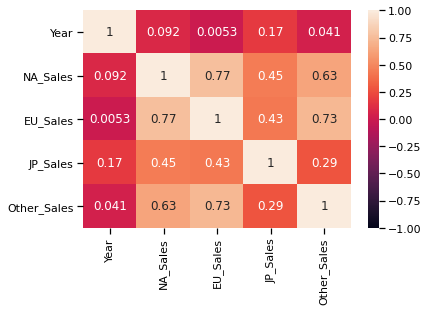

In [34]:
# numerical한 데이터 간의 상관관계 확인
sns.set_context('notebook')

sns.heatmap(abs(dataset.corr()),vmin = -1, vmax = 1,annot = True)

데이터 들의 상관관계를 확인 해 본 결과 북미와 유럽의 상관관계 그리고 유럽과 다른 대륙들간의 상관관계가 0.7 이상으로 해당 히트맵상에서 높게 잡혔다. 하지만, 이것으로 어떠한 유의성을 판단하기에는 도메인적인 지식측면에서도 부족하기에 가설을 세우거나 데이터를 분석하는데 있어서 참고정도로 이용해 볼 수 있을것 같다.

인사이트 : 북미와 유럽, 유럽과 기타 대륙간의 출고량의 관계를 살펴볼 만 하다.